In [1]:
!nvidia-smi

Sun Jun 18 03:49:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8120533f-e06c-a397-20af-961849e5d697)


In [3]:
import pandas as pd

In [4]:
train_data = pd.read_csv("train.csv")
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
test_data = pd.read_csv("test.csv")
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
train_data_shuffled = train_data.sample(frac = 0.1 , random_state = 42 )
train_data_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
1153,1661,bombing,NaN,Today is the day Hiroshima got Atomic bomb 70 ...,1
1034,1500,body%20bags,"WAISTDEEP, TX",@Deeeznvtzzz bring the body bags tho,0
3107,4458,electrocuted,HTX,Fr cuz I risk being electrocuted every shower ...,0
4379,6220,hijacker,worldwide,RT NotExplained: The only known image of infam...,0


In [7]:
train_data_shuffled = train_data.sample(frac = 1 , random_state = 42 )
train_data_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [8]:
train_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [9]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
print("No of Training Data : " , len(train_data))
print("No of Testing Data : " , len(test_data))
print("No of Total Data : " , len(train_data)  + len(test_data))

No of Training Data :  7613
No of Testing Data :  3263
No of Total Data :  10876


In [11]:
import random
random_data = random.randint(0 , len(train_data) - 5)
random_data

4097

In [12]:
import random
random_data = random.randint(0 , len(train_data) - 5)
print("Target : " , train_data["target"][random_data])
if train_data["target"][random_data] == 1:
  print("Real Disaster")
else :
  print("No Disaster")

print("\n")
print("Text : " , train_data["text"][random_data])

Target :  1
Real Disaster


Text :  the mv should just be them strutting like they mean it while buildings are burning up in the bg and flames everywhere how cool would that be


In [13]:
from sklearn.model_selection import train_test_split
train_sentence , Val_sentence , train_label  , Val_label = train_test_split(train_data_shuffled["text"] , train_data_shuffled["target"]  , test_size = 0.1 , random_state = 42)
len(train_sentence) , len(Val_sentence) , len(train_label) , len(Val_label)

(6851, 762, 6851, 762)

In [14]:
train_sentence

5921    @mogacola @zamtriossu i screamed after hitting...
3904              Imagine getting flattened by Kurt Zouma
2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
3718    @shakjn @C7 @Magnums im shaking in fear he's g...
1667    Somehow find you and I collide http://t.co/Ee8...
                              ...                        
7090    @nytimes \nDue to upheaval created by the west...
629     70 won 70...&amp; some think possibility of my...
6464    Near them on the sand half sunk a shattered vi...
6265    kesabaran membuahkan hasil indah pada saat tep...
3723    @ScottDPierce @billharris_tv @HarrisGle @Beeze...
Name: text, Length: 6851, dtype: object

In [15]:
Val_sentence

4955    DFR EP016 Monthly Meltdown - On Dnbheaven 2015...
584     FedEx no longer to transport bioterror germs i...
7411    Gunmen kill four in El Salvador bus attack: Su...
5950    @camilacabello97 Internally and externally scr...
5541    Radiation emergency #preparedness starts with ...
                              ...                        
2638              That's the ultimate road to destruction
859     @SetZorah dad why dont you claim me that mean ...
578     FedEx will no longer transport bioterror patho...
7445    Crack in the path where I wiped out this morni...
7226    I liked a @YouTube video from @dannyonpc http:...
Name: text, Length: 762, dtype: object

In [16]:
train_label

5921    0
3904    0
2804    1
3718    0
1667    0
       ..
7090    1
629     0
6464    1
6265    1
3723    0
Name: target, Length: 6851, dtype: int64

In [17]:
Val_label

4955    0
584     0
7411    1
5950    1
5541    1
       ..
2638    0
859     0
578     0
7445    0
7226    0
Name: target, Length: 762, dtype: int64

# **Converting Text into Numbers**

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens = None ,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None ,
                                    output_mode='int' ,
                                    pad_to_max_tokens=False ,
                                    output_sequence_length=None
                                    )

In [19]:
len(train_sentence)

6851

In [20]:
sum([len(i.split()) for i in train_sentence])

102087

In [21]:
round(sum([len(i.split()) for i in train_sentence])/len(train_sentence))

15

In [22]:
max_length = 15
max_word_length = 10000

In [23]:
text_vectorizer = TextVectorization(max_tokens = max_word_length ,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None ,
                                    output_mode='int' ,
                                    pad_to_max_tokens=True ,
                                    output_sequence_length=max_length
                                    )

In [24]:
text_vectorizer.adapt(train_sentence)

In [25]:
sample_sentence = "There is a chance of flood"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 786,   6, 232,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [26]:
random_sentence = random.choice(train_sentence)
print("Original Text : " ,  random_sentence)
print("\n")
print("Vectorized Version : ")
text_vectorizer([random_sentence])

Original Text :  I feel like that episode of Victorious when they all got trapped in an RV and almost died of heat stroke #MTVHottest One Direction


Vectorized Version : 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8,  214,   25,   16, 1296,    6, 7032,   45,   64,   44,  100,
         448,    4,   39, 8903]])>

In [27]:
words_in_vocabulary = text_vectorizer.get_vocabulary()
words_in_vocabulary

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [28]:
len(words_in_vocabulary)

10000

In [29]:
top_5_words = words_in_vocabulary[:5]
top_5_words

['', '[UNK]', 'the', 'a', 'in']

In [30]:
bottom_5_words = words_in_vocabulary[-5:]
bottom_5_words

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

# **Embedding**

In [31]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_word_length ,
                             input_length = max_length ,
                             output_dim = 128,
                             name = "embedding_1")

embedding

In [32]:
random_sent_= random.choice(train_sentence)
print("Original Text : " ,  random_sent_)
print("\n")
print("Embedded Version : ")
sample_embedded = embedding(text_vectorizer([random_sent_]))
sample_embedded

Original Text :  Snowstorm planned outside #Rome's St Mary Major tonight - annual occasion artificial snow remembering summer snow in 358 AD on same spot.


Embedded Version : 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00603973, -0.03536702, -0.03366037, ..., -0.00788256,
         -0.04190069, -0.04482723],
        [ 0.04529308,  0.03876169,  0.02538505, ..., -0.0380689 ,
          0.04469757, -0.0421092 ],
        [ 0.03778051, -0.03638364,  0.01504811, ...,  0.00181949,
         -0.00334624,  0.03627554],
        ...,
        [-0.0395024 ,  0.02938033,  0.01996399, ...,  0.04354746,
          0.01531677,  0.04699037],
        [ 0.01481023, -0.04949851,  0.02184572, ..., -0.04467287,
          0.01842812,  0.00813263],
        [ 0.04182519,  0.03671416,  0.01701934, ..., -0.03987407,
         -0.02030691,  0.02731824]]], dtype=float32)>

In [33]:
sample_embedded.shape

TensorShape([1, 15, 128])

In [34]:
sample_embedded[0].shape

TensorShape([15, 128])

In [35]:
sample_embedded[0][0].shape

TensorShape([128])

In [36]:
sample_embedded[0][0][0].shape

TensorShape([])

In [37]:
sample_embedded[0]

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[ 0.00603973, -0.03536702, -0.03366037, ..., -0.00788256,
        -0.04190069, -0.04482723],
       [ 0.04529308,  0.03876169,  0.02538505, ..., -0.0380689 ,
         0.04469757, -0.0421092 ],
       [ 0.03778051, -0.03638364,  0.01504811, ...,  0.00181949,
        -0.00334624,  0.03627554],
       ...,
       [-0.0395024 ,  0.02938033,  0.01996399, ...,  0.04354746,
         0.01531677,  0.04699037],
       [ 0.01481023, -0.04949851,  0.02184572, ..., -0.04467287,
         0.01842812,  0.00813263],
       [ 0.04182519,  0.03671416,  0.01701934, ..., -0.03987407,
        -0.02030691,  0.02731824]], dtype=float32)>

In [38]:
sample_embedded[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 6.0397275e-03, -3.5367023e-02, -3.3660367e-02, -4.9898922e-02,
       -2.8942004e-03, -4.6759415e-02,  2.1232557e-02, -4.4326793e-02,
        3.0164123e-03, -4.1116029e-05,  1.6631652e-02,  2.3706231e-02,
        1.8489372e-02, -3.4845792e-02, -4.9774386e-02, -4.0649343e-02,
        7.5195208e-03,  4.1637029e-02, -1.8654324e-02, -1.1979461e-02,
       -1.2759030e-02,  3.1432580e-02,  1.3156999e-02,  4.5711044e-02,
        1.8494572e-02,  2.2464883e-02, -2.7678872e-02,  2.5867000e-03,
        1.0666408e-02,  2.2225682e-02, -3.5138130e-02, -3.3639658e-02,
        1.0913290e-02, -2.5078023e-02,  2.8083492e-02, -2.7424753e-02,
       -4.8049737e-02, -1.3983775e-02,  4.4499304e-02, -1.8155169e-02,
        3.6679532e-02, -4.2757072e-02,  3.7523333e-02,  1.4830481e-02,
        1.8831518e-02,  5.2829981e-03,  3.3465195e-02,  4.8652291e-06,
        2.4843384e-02, -3.9388649e-03,  2.6965585e-02, -3.4501303e-02,
       -1.1975825e-02,  1.274

In [39]:
sample_embedded[0][0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0060397275>

# ***Model 0 : Creating a Baseline (Naive Bayes)***

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [41]:
model_0 = Pipeline([("tfidf" , TfidfVectorizer()),
                ("naive_bayes" ,MultinomialNB())])

In [42]:
model_0

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('naive_bayes', MultinomialNB())])

In [43]:
model_0.fit(train_sentence , train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('naive_bayes', MultinomialNB())])

In [44]:
baseline_score = model_0.score(Val_sentence , Val_label)
baseline_score = baseline_score* 100
baseline_score

79.26509186351706

In [45]:
sent = "We are safe"

In [46]:
baseline_pred = model_0.predict([sent])
print("Oroginal sentence : " , sent)
print("Target: " , baseline_pred)

Oroginal sentence :  We are safe
Target:  [0]


In [47]:
Val_pred = model_0.predict(Val_sentence)
Val_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [48]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support , classification_report , confusion_matrix
print(accuracy_score(Val_pred , Val_label))
print(confusion_matrix(Val_pred , Val_label))

0.7926509186351706
[[386 130]
 [ 28 218]]


In [49]:
model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(Val_pred , Val_label, average="weighted")

In [50]:
model_precision

0.8336022277575122

In [51]:
model_recall

0.7926509186351706

In [52]:
model_f1

0.7990828614653861

In [53]:
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [54]:
model_0_results = calculate_results(y_true = Val_label , y_pred = Val_pred)
model_0_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## **Model 1 : A simple Dense Model**

In [55]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [56]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
input = layers.Input(shape = (1,) , dtype = "string" )
x = text_vectorizer(input)
x = embedding(x)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
model_1 = Model(input , output , name = "model_1_dense")

In [57]:
model_1

In [58]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 dense (Dense)               (None, 15, 1)             129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [59]:
from keras.optimizers import adam
model_1.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

In [60]:
model_1_history = model_1.fit(train_sentence , train_label , epochs = 5 , validation_data = (Val_sentence , Val_label) ,
        callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230618-034936
Epoch 1/5
215/215 [==============================] - 34s 126ms/step - loss: 0.6488 - accuracy: 0.6405 - val_loss: 0.6308 - val_accuracy: 0.6485
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5967 - accuracy: 0.6897 - val_loss: 0.6232 - val_accuracy: 0.6460
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5766 - accuracy: 0.6922 - val_loss: 0.6278 - val_accuracy: 0.6461
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.5683 - accuracy: 0.6918 - val_loss: 0.6291 - val_accuracy: 0.6499
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.5632 - accuracy: 0.6923 - val_loss: 0.6320 - val_accuracy: 0.6454


In [61]:
loss_accuracy = model_1.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6454
Accuracy :  64.54069018363953
Loss :  0.631952702999115


In [62]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
input = layers.Input(shape = (1,) , dtype = "string" )
x = text_vectorizer(input)
x = embedding(x)
x = layers.MaxPooling1D()(x)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
model_1 = Model(input , output , name = "model_1_dense")

from keras.optimizers import adam
model_1.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

model_1_history = model_1.fit(train_sentence , train_label , epochs = 5 , validation_data = (Val_sentence , Val_label) ,
        callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230618-035020
Epoch 1/5
215/215 [==============================] - 12s 49ms/step - loss: 0.5781 - accuracy: 0.7434 - val_loss: 0.5834 - val_accuracy: 0.6985
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4917 - accuracy: 0.7607 - val_loss: 0.5855 - val_accuracy: 0.6984
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4640 - accuracy: 0.7699 - val_loss: 0.5996 - val_accuracy: 0.6989
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4471 - accuracy: 0.7767 - val_loss: 0.6087 - val_accuracy: 0.6991
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4325 - accuracy: 0.7825 - val_loss: 0.6191 - val_accuracy: 0.7013


In [63]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 128)           0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 7, 1)              129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [64]:
loss_accuracy = model_1.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 3ms/step - loss: 0.6191 - accuracy: 0.7013
Accuracy :  70.13498544692993
Loss :  0.6190705299377441


In [65]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
input = layers.Input(shape = (1,) , dtype = "string" )
x = text_vectorizer(input)
x = embedding(x)
x = layers.AveragePooling1D()(x)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
model_1 = Model(input , output , name = "model_1_dense")

from keras.optimizers import adam
model_1.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

model_1_history = model_1.fit(train_sentence , train_label , epochs = 5 , validation_data = (Val_sentence , Val_label) ,
        callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230618-035042
Epoch 1/5
215/215 [==============================] - 11s 47ms/step - loss: 0.5744 - accuracy: 0.7346 - val_loss: 0.5858 - val_accuracy: 0.6935
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4934 - accuracy: 0.7579 - val_loss: 0.5900 - val_accuracy: 0.6957
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4766 - accuracy: 0.7611 - val_loss: 0.6040 - val_accuracy: 0.6914
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4696 - accuracy: 0.7624 - val_loss: 0.6111 - val_accuracy: 0.6914
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4644 - accuracy: 0.7637 - val_loss: 0.6181 - val_accuracy: 0.6905


In [66]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 average_pooling1d (AverageP  (None, 7, 128)           0         
 ooling1D)                                                       
                                                                 
 dense_2 (Dense)             (None, 7, 1)              129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [67]:
loss_accuracy = model_1.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.6905
Accuracy :  69.04762387275696
Loss :  0.6181015372276306


In [68]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
input = layers.Input(shape = (1,) , dtype = "string" )
x = text_vectorizer(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
model_1 = Model(input , output , name = "model_1_dense")

from keras.optimizers import adam
model_1.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

model_1_history = model_1.fit(train_sentence , train_label , epochs = 5 , validation_data = (Val_sentence , Val_label) ,
        callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230618-035101
Epoch 1/5
215/215 [==============================] - 13s 57ms/step - loss: 0.5141 - accuracy: 0.8272 - val_loss: 0.4965 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3346 - accuracy: 0.8854 - val_loss: 0.4549 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2651 - accuracy: 0.9050 - val_loss: 0.4559 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2239 - accuracy: 0.9215 - val_loss: 0.4673 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1936 - accuracy: 0.9324 - val_loss: 0.4838 - val_accuracy: 0.7835


In [69]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [70]:
loss_accuracy = model_1.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 3ms/step - loss: 0.4838 - accuracy: 0.7835
Accuracy :  78.34645509719849
Loss :  0.4838196337223053


In [71]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.00448153, -0.0065466 , -0.04476688, ..., -0.116086  ,
         -0.02483549, -0.02369872],
        [-0.1214218 ,  0.02450966, -0.1466042 , ...,  0.02894582,
         -0.11967384, -0.06792917],
        [-0.07285535, -0.00326913, -0.01287363, ...,  0.02379862,
         -0.06824671,  0.06751571],
        ...,
        [-0.00140563,  0.01724893,  0.00605804, ...,  0.0181219 ,
          0.03712865,  0.01700327],
        [-0.16985005,  0.14899829,  0.1693085 , ...,  0.09578235,
          0.14612135,  0.19143368],
        [-0.12654418,  0.12962884,  0.22858174, ...,  0.16016985,
          0.15249085,  0.15665364]], dtype=float32)>]

In [72]:
embedded_wt = model_1.get_layer("embedding_1").get_weights()[0]
embedded_wt

array([[-0.00448153, -0.0065466 , -0.04476688, ..., -0.116086  ,
        -0.02483549, -0.02369872],
       [-0.1214218 ,  0.02450966, -0.1466042 , ...,  0.02894582,
        -0.11967384, -0.06792917],
       [-0.07285535, -0.00326913, -0.01287363, ...,  0.02379862,
        -0.06824671,  0.06751571],
       ...,
       [-0.00140563,  0.01724893,  0.00605804, ...,  0.0181219 ,
         0.03712865,  0.01700327],
       [-0.16985005,  0.14899829,  0.1693085 , ...,  0.09578235,
         0.14612135,  0.19143368],
       [-0.12654418,  0.12962884,  0.22858174, ...,  0.16016985,
         0.15249085,  0.15665364]], dtype=float32)

In [73]:
embedded_wt.shape

(10000, 128)

In [74]:
model_1_pred = model_1.predict(Val_sentence)
model_1_pred

24/24 [==============================] - 0s 2ms/step


array([[2.47631341e-01],
       [7.65910149e-01],
       [9.99101043e-01],
       [1.51113912e-01],
       [8.20888206e-02],
       [9.54422772e-01],
       [8.90529096e-01],
       [9.98790324e-01],
       [9.85059023e-01],
       [1.95049509e-01],
       [8.05042535e-02],
       [7.34413683e-01],
       [9.76130217e-02],
       [2.00237483e-01],
       [1.78847718e-03],
       [1.68412641e-01],
       [5.11925109e-02],
       [9.38349590e-02],
       [2.84602612e-01],
       [5.93938231e-01],
       [9.26948547e-01],
       [2.59554572e-02],
       [5.71498811e-01],
       [1.13066085e-01],
       [9.75460231e-01],
       [9.99399424e-01],
       [3.72249074e-02],
       [1.30329132e-01],
       [4.29330021e-02],
       [3.59735668e-01],
       [4.50375676e-01],
       [1.69161931e-01],
       [5.13345718e-01],
       [1.24050654e-01],
       [5.88641584e-01],
       [6.41887113e-02],
       [9.92861569e-01],
       [1.65387243e-01],
       [2.84813587e-02],
       [9.98955727e-01],


In [75]:
model_1_pred = model_1_pred.round()
model_1_pred[:20]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [76]:
len(model_1_pred)

762

In [77]:
model_1_results = calculate_results(y_true=Val_label,
                                    y_pred=model_1_pred)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7875988615317319,
 'recall': 0.7834645669291339,
 'f1': 0.7806382038884261}

# ***Comparing Model 1 and Model 0***

In [78]:
import numpy as np

In [79]:
model_1_results.values()

dict_values([78.34645669291339, 0.7875988615317319, 0.7834645669291339, 0.7806382038884261])

In [80]:
model_0_results.values()

dict_values([79.26509186351706, 0.8111390004213173, 0.7926509186351706, 0.7862189758049549])

In [81]:
np.array(list(model_1_results.values())) > np.array(list(model_0_results.values()))

array([False, False, False, False])

In [82]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocabulary):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embedded_wt[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [83]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Model 2 : LSTM (RNN)***

LSTM - Low Short Term Memory

In [84]:
from keras.models import Model , Sequential
from keras import layers
from keras.optimizers import adam

In [85]:
input = layers.Input(shape = (1,) , dtype = "string")
x = text_vectorizer(input)
x = embedding(x)
x = layers.LSTM(units = 64 , return_sequences = True)(x)  # --> It accepts only 3 dim input
print(x.shape)
x = layers.LSTM(units = 64)(x)   # --> It accepts only 3 dim input
print(x.shape)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
print(x.shape)
model_2 = Model(input , output , name = "model_2_LSTM")

(None, 15, 64)
(None, 64)
(None, 64)


In [86]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                      

In [87]:
model_2.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model_2.fit(train_sentence , train_label , validation_data = (Val_sentence , Val_label) , epochs = 5 ,
                callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "LSTM_model")]
              )

Saving TensorBoard log files to: model_logs/LSTM_model/20230618-035145
Epoch 1/5
215/215 [==============================] - 16s 53ms/step - loss: 0.1798 - accuracy: 0.9358 - val_loss: 0.6092 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1276 - accuracy: 0.9520 - val_loss: 0.7158 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1001 - accuracy: 0.9612 - val_loss: 0.8867 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0824 - accuracy: 0.9661 - val_loss: 0.9680 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0660 - accuracy: 0.9721 - val_loss: 1.1092 - val_accuracy: 0.7717


In [88]:
loss_accuracy = model_1.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.7861
Accuracy :  78.60892415046692
Loss :  0.49564647674560547


In [89]:
input = layers.Input(shape = (1,) , dtype = "string")
x = text_vectorizer(input)
x = embedding(x)
# x = layers.LSTM(units = 64 , return_sequences = True)(x)
print(x.shape)
x = layers.LSTM(units = 64)(x)
print(x.shape)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
print(x.shape)
model_2 = Model(input , output , name = "model_2_LSTM")

(None, 15, 128)
(None, 64)
(None, 64)


In [90]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [91]:
model_2.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model_2.fit(train_sentence , train_label , validation_data = (Val_sentence , Val_label) , epochs = 5 ,
                callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "LSTM_model")]
              )

Saving TensorBoard log files to: model_logs/LSTM_model/20230618-035229
Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.1357 - accuracy: 0.9552 - val_loss: 0.7648 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0699 - accuracy: 0.9726 - val_loss: 0.9648 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0548 - accuracy: 0.9769 - val_loss: 1.3327 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0540 - accuracy: 0.9762 - val_loss: 1.0645 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0457 - accuracy: 0.9791 - val_loss: 1.2784 - val_accuracy: 0.7651


In [92]:
loss_accuracy = model_2.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 5ms/step - loss: 1.2784 - accuracy: 0.7651
Accuracy :  76.50918364524841
Loss :  1.278412103652954


In [93]:
model_2_pred = model_2.predict(Val_sentence)
model_2_pred[:10]

24/24 [==============================] - 1s 3ms/step


array([[2.6825478e-03],
       [7.1614182e-01],
       [9.9979740e-01],
       [3.4010470e-02],
       [8.2123232e-05],
       [9.9951839e-01],
       [9.7651643e-01],
       [9.9981707e-01],
       [9.9978870e-01],
       [8.1378914e-02]], dtype=float32)

In [94]:
model_2_pred = model_2_pred.round()
model_2_pred[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [95]:
model_2_results = calculate_results(y_true=Val_label,
                                    y_pred=model_2_pred)
model_2_results

{'accuracy': 76.50918635170603,
 'precision': 0.7647204511375334,
 'recall': 0.7650918635170604,
 'f1': 0.7647456620231007}

# ***Compare Model 0 & 2 ***

In [96]:
np.array(list(model_2_results.values())) > np.array(list(model_0_results.values()))

array([False, False, False, False])

# ***Model 3 : GRU (RNN)***

GRU - Gated Recurrent

It is similar to LSTM

In [97]:
input = layers.Input(shape = (1,) , dtype = "string")
x = text_vectorizer(input)
x = embedding(x)
x = layers.GRU(units = 64 , return_sequences = True)(x)
print(x.shape)
x = layers.GRU(units = 64 )(x)
print(x.shape)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
print(x.shape)
model_3 = Model(input , output , name = "model_3_GRU")

(None, 15, 64)
(None, 64)
(None, 64)


In [98]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                       

In [99]:
model_3.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model_3.fit(train_sentence , train_label , validation_data = (Val_sentence , Val_label) , epochs = 5 ,
                callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "GRU_model")]
              )

Saving TensorBoard log files to: model_logs/GRU_model/20230618-035254
Epoch 1/5
215/215 [==============================] - 15s 53ms/step - loss: 0.1199 - accuracy: 0.9602 - val_loss: 0.8290 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0679 - accuracy: 0.9740 - val_loss: 0.8816 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0508 - accuracy: 0.9787 - val_loss: 1.4443 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0488 - accuracy: 0.9788 - val_loss: 1.1787 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0411 - accuracy: 0.9813 - val_loss: 1.3338 - val_accuracy: 0.7743


In [100]:
loss_accuracy = model_3.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 4ms/step - loss: 1.3338 - accuracy: 0.7743
Accuracy :  77.42782235145569
Loss :  1.3337738513946533


In [101]:
model_3_pred = model_3.predict(Val_sentence)
model_3_pred[:10]

24/24 [==============================] - 1s 3ms/step


array([[6.1387836e-04],
       [7.5901318e-01],
       [9.9983311e-01],
       [1.4530092e-01],
       [1.1678519e-04],
       [9.9970287e-01],
       [9.9029875e-01],
       [9.9984729e-01],
       [9.9983585e-01],
       [2.6630524e-01]], dtype=float32)

In [102]:
model_3_pred = model_3_pred.round()
model_3_pred[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [103]:
model_3_results = calculate_results(y_true=Val_label,
                                    y_pred=model_3_pred)
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7747317935775544,
 'recall': 0.7742782152230971,
 'f1': 0.7729333240681188}

# ***Comparing model 0 and 3***

In [104]:
np.array(list(model_3_results.values())) > np.array(list(model_0_results.values()))

array([False, False, False, False])



# ***Bidirectional RNN***
Combination of LSTM & GRU



In [105]:
input = layers.Input(shape = (1,) , dtype = "string")
x = text_vectorizer(input)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(units = 64 , return_sequences = True))(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(units = 64))(x)
print(x.shape)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
print(x.shape)
model_4 = Model(input , output , name = "model_4_Bodirectional")

(None, 15, 128)
(None, 15, 128)
(None, 128)
(None, 128)


In [106]:
model_4.summary()

Model: "model_4_Bodirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                             

In [107]:
model_4.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model_4.fit(train_sentence , train_label , validation_data = (Val_sentence , Val_label) , epochs = 5 ,
                callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "BIDIRECTIONAL_model")]
              )

Saving TensorBoard log files to: model_logs/BIDIRECTIONAL_model/20230618-035340
Epoch 1/5
215/215 [==============================] - 20s 58ms/step - loss: 0.0890 - accuracy: 0.9673 - val_loss: 1.8831 - val_accuracy: 0.7100
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0559 - accuracy: 0.9762 - val_loss: 0.9919 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0443 - accuracy: 0.9790 - val_loss: 1.3753 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0470 - accuracy: 0.9787 - val_loss: 1.2961 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0352 - accuracy: 0.9832 - val_loss: 1.7316 - val_accuracy: 0.7743


In [108]:
loss_accuracy = model_4.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 8ms/step - loss: 1.7316 - accuracy: 0.7743
Accuracy :  77.42782235145569
Loss :  1.7316367626190186


In [109]:
model_4_pred = model_4.predict(Val_sentence)
model_4_pred[:10]

24/24 [==============================] - 2s 7ms/step


array([[6.6602355e-05],
       [7.0268106e-01],
       [9.9994028e-01],
       [1.2747474e-01],
       [9.4226134e-06],
       [9.9993491e-01],
       [9.8033386e-01],
       [9.9995434e-01],
       [9.9991870e-01],
       [7.1958490e-02]], dtype=float32)

In [110]:
model_4_pred = model_4_pred.round()
model_4_pred[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [111]:
model_4_results = calculate_results(y_true=Val_label,
                                    y_pred=model_4_pred)
model_4_results

{'accuracy': 77.42782152230971,
 'precision': 0.7755035361291913,
 'recall': 0.7742782152230971,
 'f1': 0.7724787248794153}

# ***Comparing Model 0 & 4***

In [112]:
np.array(list(model_4_results.values())) > np.array(list(model_0_results.values()))

array([False, False, False, False])

# ***Model 5 : Conv1D(CNN)***

In [113]:
embedded_text = embedding(text_vectorizer(["This is a test sentence"]))
conv_1d = layers.Conv1D(filters = 32 , kernel_size = 5 , activation = "relu" , padding = "same")
conv_1d_output = conv_1d(embedded_text)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)


In [114]:
embedded_text

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.15421118, -0.08943924,  0.00473382, ...,  0.01681474,
          0.06347811,  0.00528523],
        [-0.16457976, -0.00151918, -0.0721127 , ..., -0.00077643,
         -0.05295511, -0.03737142],
        [-0.08350171,  0.06818415, -0.07106464, ...,  0.00891216,
         -0.0403527 ,  0.08735679],
        ...,
        [-0.00897039,  0.02117352, -0.03612978, ..., -0.0532719 ,
          0.01394746,  0.02914197],
        [-0.00897039,  0.02117352, -0.03612978, ..., -0.0532719 ,
          0.01394746,  0.02914197],
        [-0.00897039,  0.02117352, -0.03612978, ..., -0.0532719 ,
          0.01394746,  0.02914197]]], dtype=float32)>

In [115]:
embedded_text.shape

TensorShape([1, 15, 128])

In [116]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.1367854 , 0.        , 0.        ,
         0.        , 0.        , 0.14369087, 0.04611303, 0.10121339,
         0.        , 0.00122748, 0.07374576, 0.        , 0.        ,
         0.01400049, 0.06514973, 0.0786808 , 0.        , 0.        ,
         0.11332539, 0.        , 0.        , 0.05667549, 0.        ,
         0.08403288, 0.        , 0.15962082, 0.        , 0.0455352 ,
         0.        , 0.000921  ],
        [0.        , 0.09546896, 0.11828124, 0.        , 0.        ,
         0.02952744, 0.        , 0.        , 0.06398175, 0.        ,
         0.03328656, 0.        , 0.        , 0.        , 0.        ,
         0.24369265, 0.02493094, 0.11323711, 0.04054659, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.06279887,
         0.        , 0.        , 0.15407962, 0.04550057, 0.        ,
         0.06438623, 0.00615996],
        [0.09657662, 0.        , 0.03479913, 0.    

In [117]:
conv_1d_output.shape

TensorShape([1, 15, 32])

In [118]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.24599347, 0.09546896, 0.1367854 , 0.1297777 , 0.08372408,
        0.05456993, 0.12405688, 0.14369087, 0.08176012, 0.26236087,
        0.10140978, 0.06006362, 0.07374576, 0.09313133, 0.05156733,
        0.24369265, 0.06514973, 0.11323711, 0.11796805, 0.20761625,
        0.1880591 , 0.01193608, 0.05160464, 0.16491318, 0.10825364,
        0.08403288, 0.01216281, 0.15962082, 0.16712555, 0.12408376,
        0.06438623, 0.21594784]], dtype=float32)>

In [119]:
max_pool_output.shape

TensorShape([1, 32])

In [120]:
embedded_text = embedding(text_vectorizer(["This is a test sentence"]))
conv_1d = layers.Conv1D(filters = 32 , kernel_size = 5 , activation = "relu" )
conv_1d_output = conv_1d(embedded_text)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

In [121]:
embedded_text.shape , conv_1d_output.shape , max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [122]:
input = layers.Input(shape = (1,) , dtype = "string")
x = text_vectorizer(input)
x = embedding(x)
x = layers.Conv1D(filters = 32 , kernel_size = 5 , activation = "relu")(x)
x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(units = 1 , activation = "sigmoid")(x)
model_5 = Model(input , output , name = "model_5_conv_1d")

In [123]:
model_5.summary()

Model: "model_5_conv_1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 1)             

In [124]:
model_5.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model_5.fit(train_sentence , train_label , validation_data = (Val_sentence , Val_label) , epochs = 5 ,
                callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR ,
                                                 experiment_name = "Conv1D_model")]
              )

Saving TensorBoard log files to: model_logs/Conv1D_model/20230618-035433
Epoch 1/5
215/215 [==============================] - 13s 49ms/step - loss: 0.1210 - accuracy: 0.9581 - val_loss: 0.8530 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0688 - accuracy: 0.9746 - val_loss: 1.0368 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0572 - accuracy: 0.9783 - val_loss: 1.1338 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0508 - accuracy: 0.9790 - val_loss: 1.2347 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0472 - accuracy: 0.9799 - val_loss: 1.2908 - val_accuracy: 0.7638


In [125]:
loss_accuracy = model_5.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 3ms/step - loss: 1.2908 - accuracy: 0.7638
Accuracy :  76.37795209884644
Loss :  1.2907716035842896


In [126]:
model_5_pred = model_5.predict(Val_sentence)
model_5_pred = model_5_pred.round()
model_5_pred[:20]

24/24 [==============================] - 0s 3ms/step


array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [127]:
model_5_results = calculate_results(y_true=Val_label,
                                    y_pred=model_5_pred)
model_5_results

{'accuracy': 76.37795275590551,
 'precision': 0.7647678424871814,
 'recall': 0.7637795275590551,
 'f1': 0.761896339990086}

# ***Comparing Model 0 & 5***

In [128]:
model_0_results.values()

dict_values([79.26509186351706, 0.8111390004213173, 0.7926509186351706, 0.7862189758049549])

In [129]:
model_5_results.values()

dict_values([76.37795275590551, 0.7647678424871814, 0.7637795275590551, 0.761896339990086])

In [130]:
np.array(list(model_5_results.values())) > np.array(list(model_0_results.values()))

array([False, False, False, False])

# ***Model 6: TensorFlow Hub Pretrained Sentence Encoder***

#  Using Pretrained Embeddings (transfer learning for NLP)

We will use USE(Universal Sentence Encoder)

In [131]:
sample_sentence = ["This is a very good place to teach"]

In [132]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed(["When you call the universal sentence encoder on a sentence, it turns it into numbers."])

In [133]:
print(embed_samples)

tf.Tensor(
[[ 3.59669030e-02 -8.57946724e-02 -1.15274079e-02  5.25983097e-03
  -1.85217224e-02 -5.04201241e-02 -3.61693986e-02  5.34677599e-03
   4.80591506e-02  4.69074510e-02 -3.72333303e-02 -1.14954337e-02
   4.35241535e-02  7.05099031e-02  7.09376186e-02 -8.18042755e-02
   8.71716905e-03 -4.65412177e-02 -2.24577505e-02  4.68687266e-02
   2.02255812e-03  3.09907310e-02  2.04356406e-02  6.39216825e-02
  -7.64108524e-02  8.42117742e-02 -4.57603857e-02 -1.06163975e-03
  -2.05942038e-02  1.24110505e-02  5.72753772e-02  3.81562151e-02
  -2.74211410e-02 -3.54346540e-03 -9.83258486e-02 -1.24485446e-02
   3.86562757e-02  5.03195524e-02 -2.36250609e-02  3.21848062e-03
   3.22521292e-02  7.38092838e-03  4.47310172e-02 -4.12238901e-03
   1.15160486e-02  2.83772498e-02  6.01380074e-04 -5.90335056e-02
  -4.94344486e-03 -6.88529061e-03 -4.12424058e-02 -2.07704282e-03
  -1.77201908e-02 -2.27782149e-02 -2.42898241e-02  1.39938006e-02
  -5.17674796e-02  5.97374775e-02  3.81307416e-02 -3.59316431e-02

In [134]:
embed_samples.shape

TensorShape([1, 512])

In [135]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[] ,
                                      dtype = "string" ,
                                      trainable =  False ,
                                        name = "USA"
                                      )

In [136]:
from keras.models import Sequential
from keras.layers import Dense
model_6 = Sequential(sentence_encoder_layer ,  name="model_6_USE")
model_6.add(Dense(units = 1 , activation = "sigmoid"))


model_6.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [137]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USA (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [138]:
model_6_history = model_6.fit(train_sentence,
                              train_label,
                              epochs=5,
                              validation_data=(Val_sentence, Val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230618-035545
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.6497 - accuracy: 0.7268 - val_loss: 0.6156 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5824 - accuracy: 0.7878 - val_loss: 0.5654 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.5391 - accuracy: 0.7938 - val_loss: 0.5333 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5102 - accuracy: 0.7990 - val_loss: 0.5118 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4900 - accuracy: 0.7990 - val_loss: 0.4971 - val_accuracy: 0.7913


In [139]:
loss_accuracy = model_6.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 10ms/step - loss: 0.4971 - accuracy: 0.7913
Accuracy :  79.1338562965393
Loss :  0.4971221387386322


In [140]:
from keras.models import Sequential
from keras.layers import Dense
model_6 = Sequential(sentence_encoder_layer ,  name="model_6_USE")
model_6.add(Dense(units = 64 , activation = "relu"))
model_6.add(Dense(units = 1 , activation = "sigmoid"))


model_6.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])


model_6_history = model_6.fit(train_sentence,
                              train_label,
                              epochs=5,
                              validation_data=(Val_sentence, Val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230618-035608
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.5073 - accuracy: 0.7848 - val_loss: 0.4469 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4151 - accuracy: 0.8132 - val_loss: 0.4359 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4006 - accuracy: 0.8205 - val_loss: 0.4317 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3935 - accuracy: 0.8240 - val_loss: 0.4276 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3875 - accuracy: 0.8279 - val_loss: 0.4292 - val_accuracy: 0.8150


In [141]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USA (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [142]:
loss_accuracy = model_6.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 10ms/step - loss: 0.4292 - accuracy: 0.8150
Accuracy :  81.49606585502625
Loss :  0.42918136715888977


In [143]:
model_6_pred = model_6.predict(Val_sentence)
model_6_pred = model_6_pred.round()
model_6_pred[:20]

24/24 [==============================] - 1s 9ms/step


array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [144]:
model_6_results = calculate_results(y_true=Val_label,
                                    y_pred=model_6_pred)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

# ***Comparing Model 0 & 6***

In [145]:
np.array(list(model_6_results.values())) > np.array(list(model_0_results.values()))

array([ True,  True,  True,  True])

# ***Model 7 : TensorFlow Hub Pretrained Sentence Encoder(10% data)***

# * Model 7 is almost equal to model 6

In [146]:
ten_percent_train_data = train_data.sample(frac = 0.1 ,random_state = 42)
ten_percent_train_data

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
1153,1661,bombing,NaN,Today is the day Hiroshima got Atomic bomb 70 ...,1
1034,1500,body%20bags,"WAISTDEEP, TX",@Deeeznvtzzz bring the body bags tho,0
3107,4458,electrocuted,HTX,Fr cuz I risk being electrocuted every shower ...,0
4379,6220,hijacker,worldwide,RT NotExplained: The only known image of infam...,0


In [147]:
ten_percent_train_sentence = ten_percent_train_data["text"]
ten_percent_train_sentence

2644    So you have a new weapon that can cause un-ima...
2227    The f$&amp;@ing things I do for #GISHWHES Just...
5448    DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...
132     Aftershock back to school kick off was great. ...
6845    in response to trauma Children of Addicts deve...
                              ...                        
1153    Today is the day Hiroshima got Atomic bomb 70 ...
1034                 @Deeeznvtzzz bring the body bags tho
3107    Fr cuz I risk being electrocuted every shower ...
4379    RT NotExplained: The only known image of infam...
2288    Read this already in '14 but it was and remain...
Name: text, Length: 761, dtype: object

In [148]:
ten_percent_train_label = ten_percent_train_data["target"]
ten_percent_train_label

2644    1
2227    0
5448    1
132     0
6845    0
       ..
1153    1
1034    0
3107    0
4379    0
2288    0
Name: target, Length: 761, dtype: int64

In [149]:
ten_percent_train_label.value_counts()

0    425
1    336
Name: target, dtype: int64

In [150]:
from tensorflow.keras.models import clone_model
model_7 = clone_model(model_6)

In [151]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USA (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [152]:
model_7.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])


model_7_history = model_7.fit(ten_percent_train_sentence,
                              ten_percent_train_label,
                              epochs=5,
                              validation_data=(Val_sentence, Val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_ten_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_ten_percent/20230618-035631
Epoch 1/5
24/24 [==============================] - 4s 39ms/step - loss: 0.6727 - accuracy: 0.6702 - val_loss: 0.6418 - val_accuracy: 0.7887
Epoch 2/5
24/24 [==============================] - 1s 25ms/step - loss: 0.6037 - accuracy: 0.8016 - val_loss: 0.5750 - val_accuracy: 0.7874
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5269 - accuracy: 0.8121 - val_loss: 0.5158 - val_accuracy: 0.7848
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4646 - accuracy: 0.8160 - val_loss: 0.4799 - val_accuracy: 0.7822
Epoch 5/5
24/24 [==============================] - 1s 22ms/step - loss: 0.4221 - accuracy: 0.8226 - val_loss: 0.4631 - val_accuracy: 0.7900


In [153]:
loss_accuracy = model_7.evaluate(Val_sentence , Val_label)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

24/24 [==============================] - 0s 10ms/step - loss: 0.4631 - accuracy: 0.7900
Accuracy :  79.00262475013733
Loss :  0.46308663487434387


In [154]:
model_7_pred = model_7.predict(Val_sentence)
model_7_pred = model_7_pred.round()
model_7_pred[:20]

24/24 [==============================] - 1s 9ms/step


array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [155]:
model_7_results = calculate_results(y_true=Val_label,
                                    y_pred=model_7_pred)
model_7_results

{'accuracy': 79.00262467191601,
 'precision': 0.7897452941640452,
 'recall': 0.7900262467191601,
 'f1': 0.7896167159209722}

# ***Compare model 0 & 7***

In [156]:
np.array(list(model_7_results.values())) > np.array(list(model_0_results.values()))

array([False, False, False,  True])

# ***Comparing all Models***

In [157]:
all_model_results = pd.DataFrame()
all_model_results["0_Baseline"] = model_0_results
all_model_results["1_Simple_dense_model"] = model_1_results
all_model_results["2_LSTM (RNN)"] = model_2_results
all_model_results["3_GRU (RNN)"] = model_3_results
all_model_results["4_Bidirectonal (RNN)"] = model_4_results
all_model_results["5_Conv1D"] = model_5_results
all_model_results["6_Tf_hub_USE"] = model_6_results
all_model_results["7_Tf_hub_USE_ten_percent"] = model_7_results

In [158]:
all_model_results

,0_Baseline,1_Simple_dense_model,2_LSTM (RNN),3_GRU (RNN),4_Bidirectonal (RNN),5_Conv1D,6_Tf_hub_USE,7_Tf_hub_USE_ten_percent
accuracy,79.265092,78.346457,76.509186,77.427822,77.427822,76.377953,81.496063,79.002625
precision,0.811139,0.787599,0.764720,0.774732,0.775504,0.764768,0.817906,0.789745
recall,0.792651,0.783465,0.765092,0.774278,0.774278,0.763780,0.814961,0.790026
f1,0.786219,0.780638,0.764746,0.772933,0.772479,0.761896,0.813230,0.789617


In [159]:
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_Baseline,79.265092,0.811139,0.792651,0.786219
1_Simple_dense_model,78.346457,0.787599,0.783465,0.780638
2_LSTM (RNN),76.509186,0.764720,0.765092,0.764746
3_GRU (RNN),77.427822,0.774732,0.774278,0.772933
4_Bidirectonal (RNN),77.427822,0.775504,0.774278,0.772479
5_Conv1D,76.377953,0.764768,0.763780,0.761896
6_Tf_hub_USE,81.496063,0.817906,0.814961,0.813230
7_Tf_hub_USE_ten_percent,79.002625,0.789745,0.790026,0.789617


In [160]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [161]:
all_model_results

,accuracy,precision,recall,f1
0_Baseline,0.792651,0.811139,0.792651,0.786219
1_Simple_dense_model,0.783465,0.787599,0.783465,0.780638
2_LSTM (RNN),0.765092,0.764720,0.765092,0.764746
3_GRU (RNN),0.774278,0.774732,0.774278,0.772933
4_Bidirectonal (RNN),0.774278,0.775504,0.774278,0.772479
5_Conv1D,0.763780,0.764768,0.763780,0.761896
6_Tf_hub_USE,0.814961,0.817906,0.814961,0.813230
7_Tf_hub_USE_ten_percent,0.790026,0.789745,0.790026,0.789617


<Axes: >

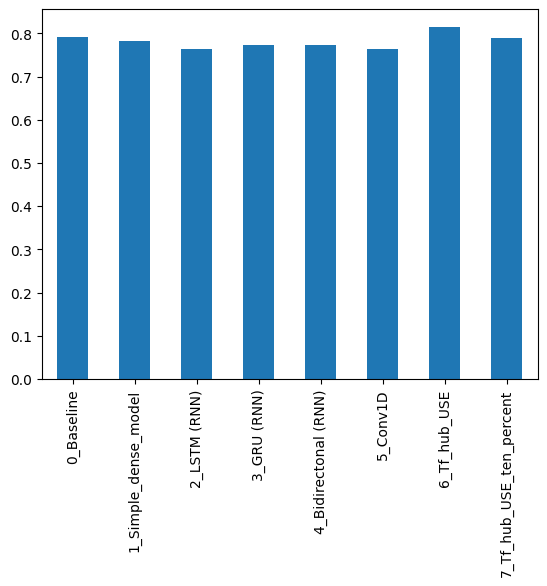

In [162]:
import matplotlib.pyplot as plt
all_model_results["accuracy"].plot(kind = "bar")

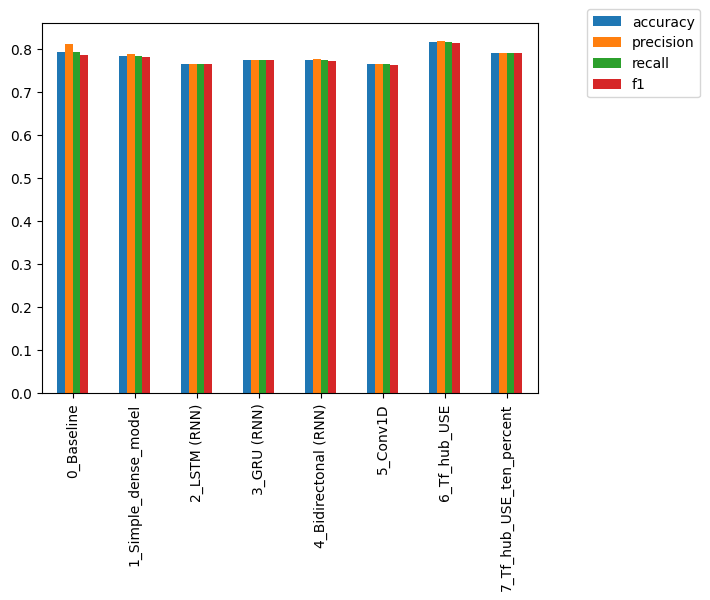

In [163]:
all_model_results.plot(kind = "bar")
plt.legend(loc = (1.1 , 0.8))

<Axes: >

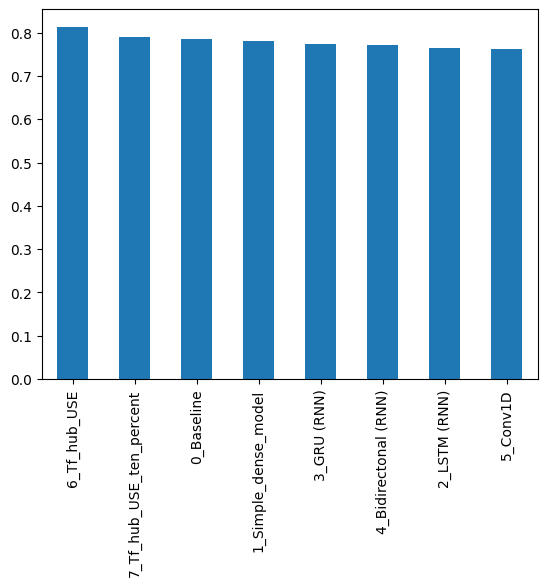

In [164]:
all_model_results.sort_values(by = "f1" , ascending = False)["f1"].plot(kind = "bar")

# ***Tensorboard dev***

# ***Saving & Loading our best model ***

2 Types :
1) HDF5 Format
2) SaveModel Format

In [165]:
model_6.save("model_6.hd5")

In [166]:
from keras.models import load_model
import tensorflow_hub as hub
load_model_6 = load_model("model_6.hd5" , custom_objects = {"KerasLayers" : hub.KerasLayer})

In [167]:
load_model_6.evaluate(Val_sentence , Val_label)

24/24 [==============================] - 1s 11ms/step - loss: 0.4292 - accuracy: 0.8150


[0.42918136715888977, 0.8149606585502625]

In [168]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

In [169]:
model_6.save("model_6_SaveModel_format")

In [170]:
load_model_6 = load_model("model_6_SaveModel_format")

In [171]:
load_model_6.evaluate(Val_sentence , Val_label)

24/24 [==============================] - 1s 10ms/step - loss: 0.4292 - accuracy: 0.8150


[0.42918136715888977, 0.8149606585502625]

In [172]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

# ***Finding the wrong predictions***

In [173]:
model_6_pred[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [174]:
model_6_pred_proba  = model_6.predict(Val_sentence)

24/24 [==============================] - 0s 10ms/step


In [175]:
model_6_pred = model_6.predict(Val_sentence).round()
model_6_pred[:10]

24/24 [==============================] - 0s 9ms/step


array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [176]:
val_df = pd.DataFrame()
val_df["text"] = Val_sentence
val_df["target"] = Val_label
val_df["predicted_label"] = model_6_pred
val_df["predicted_probability"] = model_6_pred_proba


In [177]:
val_df

,text,target,predicted_label,predicted_probability
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.152752
584,FedEx no longer to transport bioterror germs i...,0,1.0,0.740868
7411,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988524
5950,@camilacabello97 Internally and externally scr...,1,0.0,0.200073
5541,Radiation emergency #preparedness starts with ...,1,1.0,0.722904
...,...,...,...,...
2638,That's the ultimate road to destruction,0,0.0,0.101962
859,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.092677
578,FedEx will no longer transport bioterror patho...,0,1.0,0.861344
7445,Crack in the path where I wiped out this morni...,0,1.0,0.677738


In [178]:
wrong_prediction = val_df[val_df["target"] != val_df["predicted_label"]]
wrong_prediction = wrong_prediction.sort_values("predicted_probability" , ascending = True)
wrong_prediction

,text,target,predicted_label,predicted_probability
1861,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.035934
5464,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.039842
6160,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.041077
2250,Why are you deluged with low self-image? Take ...,1,0.0,0.042743
6221,I get to smoke my shit in peace,1,0.0,0.043332
...,...,...,...,...
3991,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.831406
1195,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.832751
4821,@noah_anyname That's where the concentration c...,0,1.0,0.852105
578,FedEx will no longer transport bioterror patho...,0,1.0,0.861344


In [179]:
wrong_prediction[:10]  # False Negative

,text,target,predicted_label,predicted_probability
1861,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.035934
5464,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.039842
6160,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.041077
2250,Why are you deluged with low self-image? Take ...,1,0.0,0.042743
6221,I get to smoke my shit in peace,1,0.0,0.043332
4154,You can never escape me. Bullets don't harm me...,1,0.0,0.048199
257,@willienelson We need help! Horses will die!Pl...,1,0.0,0.049484
3272,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.055026
2522,going to redo my nails and watch behind the sc...,1,0.0,0.056358
6836,@BoyInAHorsemask its a panda trapped in a dogs...,1,0.0,0.062424


In [180]:
wrong_prediction.tail(10) # False Positive

,text,target,predicted_label,predicted_probability
388,The Sound of Arson,0,1.0,0.769751
1628,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.771438
6213,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.783324
6859,@AshGhebranious civil rights continued in the ...,0,1.0,0.789535
1186,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.815826
3991,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.831406
1195,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.832751
4821,@noah_anyname That's where the concentration c...,0,1.0,0.852105
578,FedEx will no longer transport bioterror patho...,0,1.0,0.861344
1206,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.915631


In [181]:
for row in wrong_prediction[:10].itertuples():
  _ , text , target , predicted_label , predicted_probability = row
  print("Target : {}".format(target) )
  print("predicted_label : {}".format(predicted_label) )
  print("predicted_probability : {}".format(predicted_probability) )
  print("\n")
  print("text : {}".format(text) )
  print("\n")
  print("----\n")


Target : 1
predicted_label : 0.0
predicted_probability : 0.03593357652425766


text : Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube


----

Target : 1
predicted_label : 0.0
predicted_probability : 0.039841677993535995


text : Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP


----

Target : 1
predicted_label : 0.0
predicted_probability : 0.04107734188437462


text : @SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren


----

Target : 1
predicted_label : 0.0
predicted_probability : 0.04274279624223709


text : Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy


----

Target : 1
predicted_label : 0.0
predicted_probability : 0.043331701308488846


text : I get to smoke my shit in peace


----

Target : 1
predicted_label : 0.0
predicted_probability : 0.04819898307323456


text : You can 

In [182]:
for row in wrong_prediction.tail(10).itertuples():
  _ , text , target , predicted_label , predicted_probability = row
  print("Target : {}".format(target) )
  print("predicted_label : {}".format(predicted_label) )
  print("predicted_probability : {}".format(predicted_probability) )
  print("\n")
  print("text : {}".format(text) )
  print("\n")
  print("----\n")

Target : 0
predicted_label : 1.0
predicted_probability : 0.769750714302063


text : The Sound of Arson


----

Target : 0
predicted_label : 1.0
predicted_probability : 0.7714381217956543


text : åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo


----

Target : 0
predicted_label : 1.0
predicted_probability : 0.7833243608474731


text : [55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY


----

Target : 0
predicted_label : 1.0
predicted_probability : 0.7895347476005554


text : @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.


----

Target : 0
predicted_label : 1.0
predicted_probability : 0.8158259391784668


text : Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/

# ***Prediction on test data***

In [183]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [184]:
test_data["text"].head(10)

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
5                   We're shaking...It's an earthquake
6    They'd probably still show more life than Arse...
7                                    Hey! How are you?
8                                     What a nice hat?
9                                            Fuck off!
Name: text, dtype: object

In [185]:
len(test_data)

3263

In [186]:
test_sentence = test_data["text"].to_list()
test_sentence[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [187]:
test_samples = random.sample(test_sentence , 10)
test_samples


['08 Army personnel including 5 Majors were martyred when a helicopter of Army Medical Corps crashed near Mansehra. http://t.co/wyMrtwsZHU',
 '@unitedutilities not happy I received text now about #Parasite danger.I am a #transplantee &amp; #Virus can kill #kidney https://t.co/9AasSFrdP1',
 'Canceling Deal for 2 Warships France Agrees to Repay Russia via @nytimes http://t.co/j7vbskHAXn',
 '#NYCHA says the pipe that burst and flooded apartments in a senior center is being repaired. http://t.co/eCyui3290H http://t.co/6S6sYUYypL',
 '#CNNHoTD soccer mom wild swimming handcuffed child teen hookup case nuclear devastation showers Miss Piggy... http://t.co/XG9s40AFtZ',
 '(SJ GIST): 148 Houses Farm Produce Destroyed By Flood In Sokoto: About 148 houses were on Saturday destroyed ... http://t.co/vqU1Y31hKU',
 "Wreckage 'conclusively confirmed' as from MH370: Malaysia PM http://t.co/Se1QkNPltS | https://t.co/DnhRviV1dJ",
 "He said he's 'gonna put a ring in my Harvey's burger since i love it so mu

In [188]:
for i in test_samples:
  pred_proba = model_6.predict([i])
  pred = pred_proba.round()
  print(f"Pred: {int(pred)}, Prob: {pred_proba}")
  print(f"Text:\n{i}\n")
  print("----\n")

1/1 [==============================] - 0s 416ms/step
Pred: 1, Prob: [[0.96641123]]
Text:
08 Army personnel including 5 Majors were martyred when a helicopter of Army Medical Corps crashed near Mansehra. http://t.co/wyMrtwsZHU

----

1/1 [==============================] - 0s 38ms/step
Pred: 0, Prob: [[0.12390438]]
Text:
@unitedutilities not happy I received text now about #Parasite danger.I am a #transplantee &amp; #Virus can kill #kidney https://t.co/9AasSFrdP1

----

1/1 [==============================] - 0s 44ms/step
Pred: 1, Prob: [[0.658476]]
Text:
Canceling Deal for 2 Warships France Agrees to Repay Russia via @nytimes http://t.co/j7vbskHAXn

----

1/1 [==============================] - 0s 40ms/step
Pred: 1, Prob: [[0.8795549]]
Text:
#NYCHA says the pipe that burst and flooded apartments in a senior center is being repaired. http://t.co/eCyui3290H http://t.co/6S6sYUYypL

----

1/1 [==============================] - 0s 39ms/step
Pred: 0, Prob: [[0.2991256]]
Text:
#CNNHoTD soccer mo

# ***Testing Twitter Sentence***

In [189]:
def prediction_on_twitter_sentence(sentence , model):
  pred_proba = model.predict([sentence])
  pred = pred_proba.round()
  print(f"Sentence : {sentence}")
  print(f"pred_proba : {pred_proba}")
  print(f"pred : {pred}")
  if pred == 0:
    print("Safe")
  else :
    print("Disaster")


In [190]:
sent_1 = "A lot of City is affected by Earthquake !"


In [191]:
prediction_on_twitter_sentence(sentence = sent_1 , model =  model_6)

1/1 [==============================] - 0s 38ms/step
Sentence : A lot of City is affected by Earthquake !
pred_proba : [[0.91740286]]
pred : [[1.]]
Disaster


# ***Speed/Score Tradeoff***

In [192]:
import time

In [193]:
def predict_time(samples , model):
  start_time = time.perf_counter()
  prediction = model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time , time_per_pred

In [194]:
model_0_total_time  , model_0_total_time_per_pred = predict_time(Val_sentence , model_0)
model_0_total_time  , model_0_total_time_per_pred

(0.019147628999917288, 2.5128122047135548e-05)

In [195]:
model_6_total_time  , model_6_total_time_per_pred = predict_time(Val_sentence , model_6)
model_6_total_time  , model_6_total_time_per_pred

24/24 [==============================] - 0s 9ms/step


(0.3742807050000465, 0.0004911820275591162)

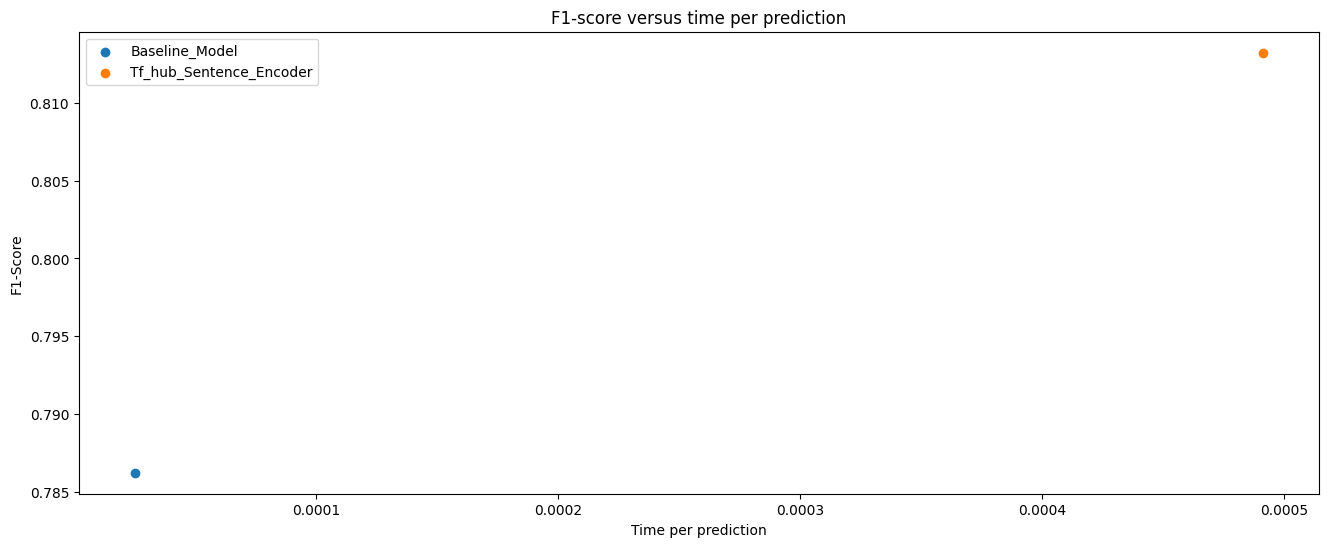

In [196]:
plt.figure(figsize=(16, 6))
plt.scatter(model_0_total_time_per_pred , model_0_results["f1"] , label = "Baseline_Model")
plt.scatter(model_6_total_time_per_pred , model_6_results["f1"] , label = "Tf_hub_Sentence_Encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");